<a href="https://colab.research.google.com/github/hyyy11/colab0000/blob/main/13%EC%9D%BC%EC%B0%A8_0330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

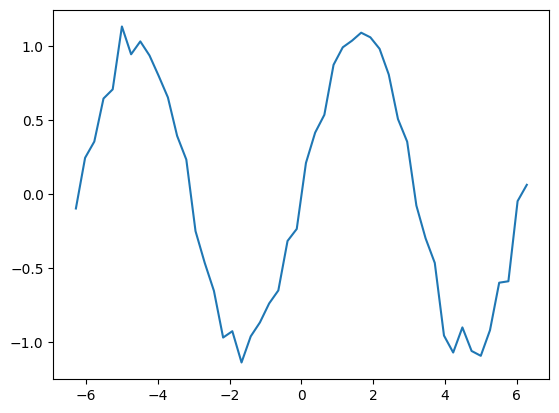

(40, 10, 1)
(40, 10, 1)


In [20]:
import numpy as np 
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)      #-2파이에서 2파이까지
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data))     #sin()함수에 난수로 노이즈를 더한다

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10    #시계열의 수
n_sample = len(x_data)-n_rnn   #샘플 수
x = np.zeros((n_sample, n_rnn))   #입력
t = np.zeros((n_sample, n_rnn))   #정답
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+1:i+n_rnn+1]   #시계열을 입력보다도 1개 뒤로 비켜놓는다

x = x.reshape(n_sample, n_rnn, 1)    #Keras에서의 RNN에서는 입력을 (샘플 수, 시계열의 수, 입력층의 뉴런 수)로 한다
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)    #이번은 입력과 같은 형태
print(t.shape)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

n_in = 1    #입력층의 뉴런 수
n_mid = 20  #중간층의 뉴런 수
n_out = 1   #출력층의 뉴런 수

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))   #간단한 RNN층
model.add(Dense(n_out, activation="linear"))            #전결합충
model.compile(loss="mean_squared_error", optimizer="sgd")    #오차는 제곱오차, 최적화 알고리즘은 SGD
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10, 20)            440       
                                                                 
 dense_3 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history = model.fit(x, t, epochs=20, batch_size=8, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 1s 70ms/step - loss: 0.8250 - val_loss: 0.5237
Epoch 2/20
5/5 [==============================] - 0s 17ms/step - loss: 0.4967 - val_loss: 0.3532
Epoch 3/20
5/5 [==============================] - 0s 14ms/step - loss: 0.3456 - val_loss: 0.2630
Epoch 4/20
5/5 [==============================] - 0s 16ms/step - loss: 0.2631 - val_loss: 0.2130
Epoch 5/20
5/5 [==============================] - 0s 15ms/step - loss: 0.2143 - val_loss: 0.1824
Epoch 6/20
5/5 [==============================] - 0s 20ms/step - loss: 0.1818 - val_loss: 0.1646
Epoch 7/20
5/5 [==============================] - 0s 18ms/step - loss: 0.1589 - val_loss: 0.1508
Epoch 8/20
5/5 [==============================] - 0s 15ms/step - loss: 0.1435 - val_loss: 0.1357
Epoch 9/20
5/5 [==============================] - 0s 19ms/step - loss: 0.1310 - val_loss: 0.1278
Epoch 10/20
5/5 [==============================] - 0s 16ms/step - loss: 0.1212 - val_loss: 0.1214
Epoch 11/20
5/5 [============

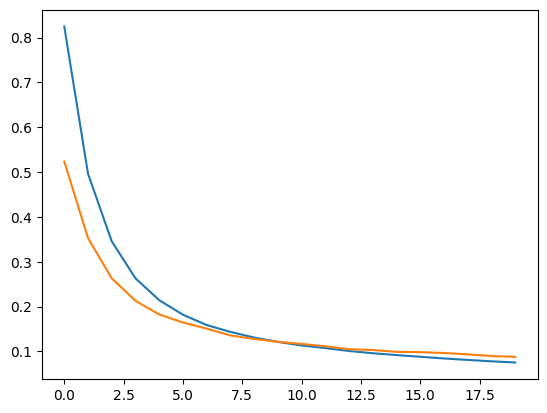

In [23]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

1/1 [==============================] - 0s 28ms/step


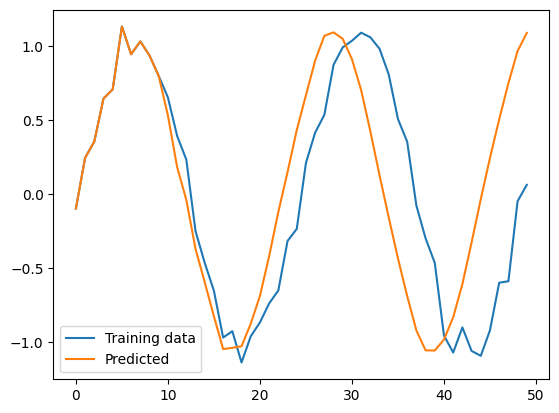

In [25]:
predicted = x[0].reshape(-1)    #처음의 입력. reshape(-1)으로 1차원 백터로 한다

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))        #최근 데이터를 사용해서 결과를 예측한다
    predicted = np.append(predicted, y[0][n_rnn-1][0])                #출력의 최후의 결과를 predicted에 추가 한다

plt.plot(np.arange(len(sin_data)), sin_data, label="Training data")   #훈련에 사용한 데이터
plt.plot(np.arange(len(predicted)), predicted,  label="Predicted")    #예측 결과
plt.legend()
plt.show()